MACHINE LEARNING MODEL

Importing data preprocessing libraries 

In [189]:
import pandas as pd
import numpy as np

In [190]:
socialData=pd.read_csv('Social_Network_Ads.csv')
socialData=pd.DataFrame(socialData)
socialData.describe()




,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [191]:
socialData.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [192]:
socialData.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


Dealing with categorical data(gender)

In [193]:
dataMapping={
    'Male':1,
    'Female':0
}
socialData['Gender']=socialData['Gender'].map(dataMapping)
socialData

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


Importing data modeling libraries

In [194]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression


In [195]:
Y=socialData.Purchased

In [196]:
x=socialData[['User ID','Gender','Age','EstimatedSalary']]
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [197]:
x_train, x_test,y_train,Y_test= train_test_split(x,Y, test_size=0.2, random_state=42)


Using LogisticRegression in classfying the data 

In [198]:

model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)

Accuracy measure

In [199]:
from sklearn.metrics import accuracy_score
predictions = model.predict(x_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7375


Visualizing Data

/tmp/ipykernel_10303/3858088881.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


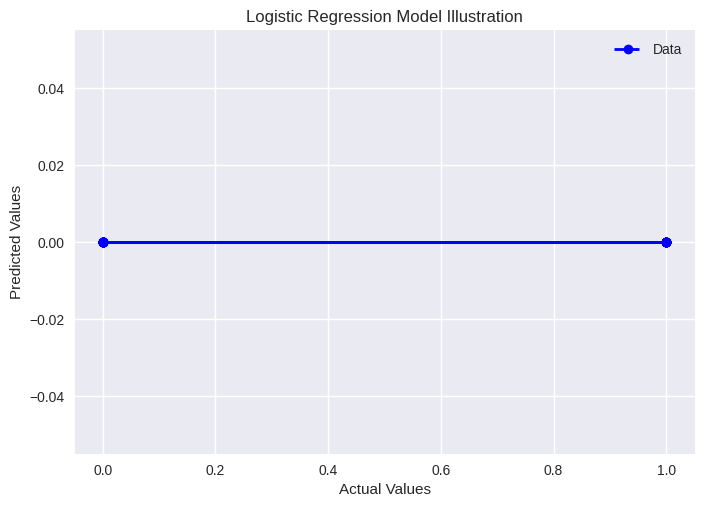

In [214]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# Assuming Y_test and predictions are NumPy arrays or lists
plt.plot(Y_test, predictions, marker='o', linestyle='--', color='blue', linewidth=2, label='Data')
plt.title('Logistic Regression Model Illustration')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


USING NEURAL NETWORK FROM TENSOR FLOW

In [200]:
numeric_col=['User ID','Age','EstimatedSalary']
categorical_col=['Gender']

Data preprocessing pipeline

In [201]:
numeric_transformer=Pipeline(steps=['scaler',StandardScaler])
categorical_transformer=Pipeline(steps=['scaler',OneHotEncoder(drop='first')])

In [202]:

class NumericTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        return self.scaler.transform(X)

# Create transformers for numeric and categorical columns
numeric_transformer = NumericTransformer()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_col),
        ('cat', categorical_transformer, categorical_col)
    ],
    remainder='passthrough'  # Pass through any columns not specified
)

# Apply preprocessing to the DataFrame
X = preprocessor.fit_transform(x)

# Print the preprocessed data
print(X)


[[-0.93657932 -1.78179743 -1.49004624  1.        ]
 [ 1.66838653 -0.25358736 -1.46068138  1.        ]
 [-0.32087714 -1.11320552 -0.78528968  0.        ]
 ...
 [-0.52039175  1.17910958 -1.46068138  0.        ]
 [ 0.88695546 -0.15807423 -1.07893824  1.        ]
 [-1.36231017  1.08359645 -0.99084367  0.        ]]


Neural Network Model

In [210]:
model = keras.Sequential([
    keras.layers.Input(shape=(4)),  
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=25, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, Y_test)
print(f"Test accuracy: {test_accuracy}")

predictions = model.predict(x_test)

Epoch 1/20
11/11 [==============================] - 3s 111ms/step - loss: 2020253.8750 - accuracy: 0.6289 - val_loss: 1663953.0000 - val_accuracy: 0.6875
Epoch 2/20
11/11 [==============================] - 0s 30ms/step - loss: 1943833.8750 - accuracy: 0.6289 - val_loss: 1600942.7500 - val_accuracy: 0.6875
Epoch 3/20
11/11 [==============================] - 0s 19ms/step - loss: 1872898.8750 - accuracy: 0.6289 - val_loss: 1538814.2500 - val_accuracy: 0.6875
Epoch 4/20
11/11 [==============================] - 0s 28ms/step - loss: 1801124.1250 - accuracy: 0.6289 - val_loss: 1481846.1250 - val_accuracy: 0.6875
Epoch 5/20
11/11 [==============================] - 0s 34ms/step - loss: 1732899.7500 - accuracy: 0.6289 - val_loss: 1427302.8750 - val_accuracy: 0.6875
Epoch 6/20
11/11 [==============================] - 0s 27ms/step - loss: 1668061.8750 - accuracy: 0.6289 - val_loss: 1372231.6250 - val_accuracy: 0.6875
Epoch 7/20
11/11 [==============================] - 0s 21ms/step - loss: 1602051.